## Predict Food Time delivery using Regression Decision Tree

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.inspection import permutation_importance

### #1 Import the dataset and set the variables

In [25]:
df = pd.read_csv('../Dataset/Food_Delivery_Times_Cleaned.csv')
X = df.drop(columns = ['Delivery_Time_min'])
y = df['Delivery_Time_min']


### #2 Divide our data and train the model

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

### #3 Make Predictions

In [27]:
y_prediction = model.predict(X_test)

### #4 Visualize and compare our prediction

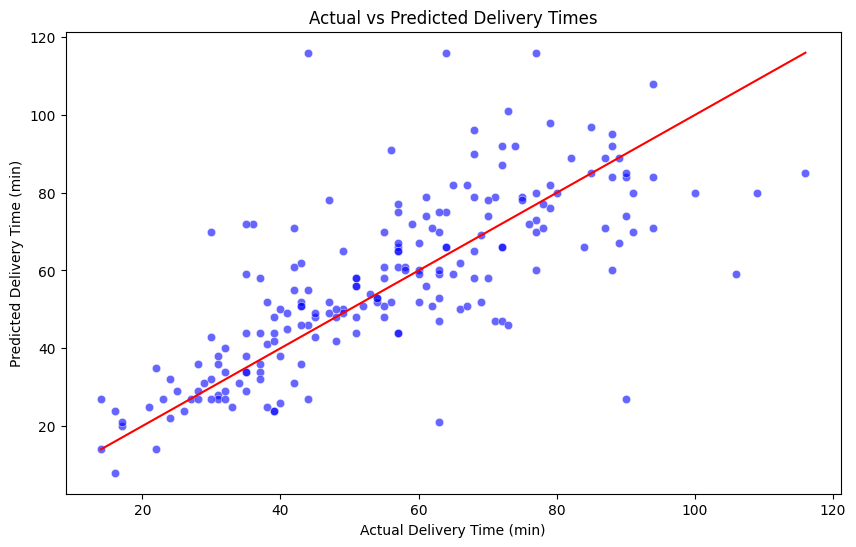

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_prediction, color = 'blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='solid')
plt.xlabel('Actual Delivery Time (min)')
plt.ylabel('Predicted Delivery Time (min)')
plt.title("Actual vs Predicted Delivery Times")
plt.show()


### #5 Calculate MAE and RMSE error and visualize it

Mean Absolute Error (MAE): 10.66 minutes
Mean Squared Error (MSE): 15.47 minutes^2


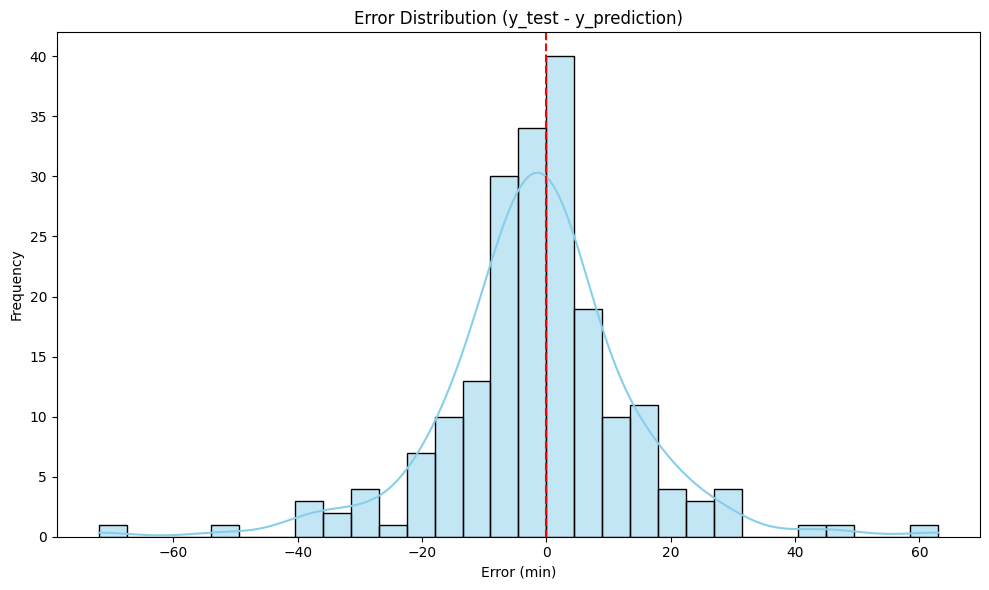

In [ ]:
mae = mean_absolute_error(y_test, y_prediction)
rmse = np.sqrt(mean_squared_error(y_test, y_prediction))
print(f"Mean Absolute Error (MAE): {mae:.2f} minutes")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} minutes")

residuals = y_test - y_prediction

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='skyblue', bins=30)
plt.title("Error Distribution (y_test - y_prediction)")
plt.xlabel("Error (min)")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--')
plt.tight_layout()
plt.show()

### #6 Which features has influenced the most in the predictions

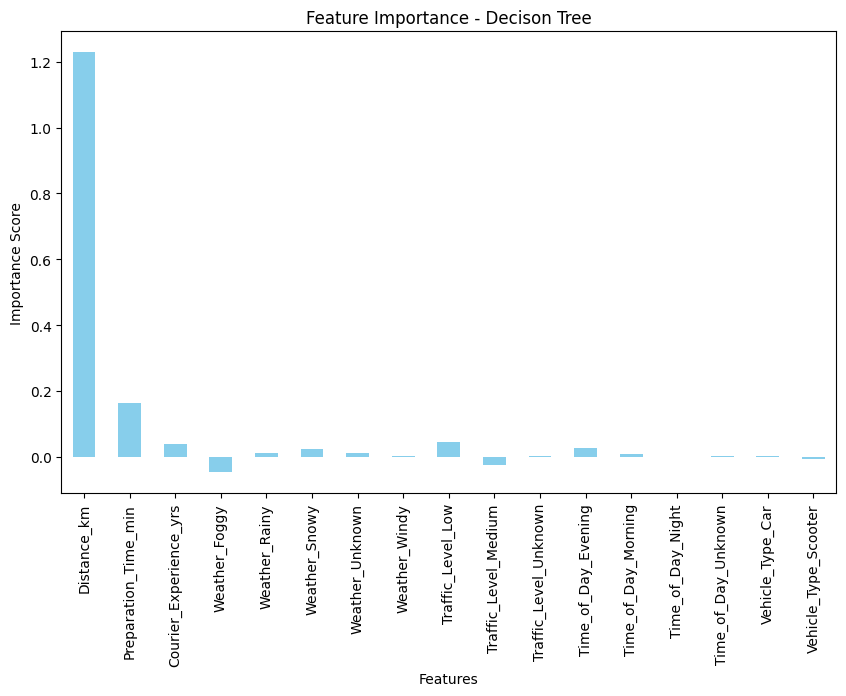

In [31]:
importance_per = permutation_importance(model, X_test, y_test, n_repeats=100, random_state=42)
importance = pd.Series(importance_per.importances_mean, index=X.columns)
importance.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
importance.plot(kind='bar', color='skyblue')
plt.title('Feature Importance - Decison Tree')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()